<div style="border: 5px solid #000000;background-color: skyblue;padding: 10px;">

<h1 style="color:blue; text-align:center;">SVM-COMPARITIVE ANALYSIS</h1>
 
</div>

## SVM-Linear Kernel

In [1]:
!pip install mne
!pip install scipy
!pip install scikit-learn

import numpy as np
from glob import glob
import scipy.io
import mne
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

IDD_data_path = './DATASET/Data/CleanData/CleanData_IDD/Rest'
TDC_data_path = './DATASET/Data/CleanData/CleanData_TDC/Rest'

def convertmat2mne(data):
    ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    ch_types = ['eeg'] * 14
    sampling_freq = 128
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    info.set_montage('standard_1020')
    data = mne.io.RawArray(data, info)
    data.set_eeg_reference()
    data.filter(l_freq=1, h_freq=30)
    epochs = mne.make_fixed_length_epochs(data, duration=4, overlap=0)
    return epochs.get_data()

idd_subject = []
for idd in glob(IDD_data_path + '/*.mat'):
    data = scipy.io.loadmat(idd)['clean_data']
    data = convertmat2mne(data)
    idd_subject.append(data)

tdc_subject = []
for tdc in glob(TDC_data_path + '/*.mat'):
    data = scipy.io.loadmat(tdc)['clean_data']
    data = convertmat2mne(data)
    tdc_subject.append(data)

control_epochs_labels = [len(i) * [0] for i in tdc_subject]
patients_epochs_labels = [len(i) * [1] for i in idd_subject]

data_list = tdc_subject + idd_subject
label_list = control_epochs_labels + patients_epochs_labels
groups_list = [[i] * len(j) for i, j in enumerate(data_list)]

gkf = GroupKFold(n_splits=5)

class StandardScaler3D(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self, X):
        return self.scaler.transform(X.reshape(-1, X.shape[2])).reshape(X.shape)

data_array = np.concatenate(data_list)
label_array = np.concatenate(label_list)
group_array = np.concatenate(groups_list)
data_array = np.moveaxis(data_array, 1, 2)

accuracy_svm = []
for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_labels = data_array[train_index], label_array[train_index]
    val_features, val_labels = data_array[val_index], label_array[val_index]

    train_features_svm = train_features.reshape(train_features.shape[0], -1)
    val_features_svm = val_features.reshape(val_features.shape[0], -1)

    svm_model = SVC(kernel='linear')
    svm_model.fit(train_features_svm, train_labels)

    val_predictions = svm_model.predict(val_features_svm)
    accuracy_svm.append(accuracy_score(val_labels, val_predictions))

average_accuracy_svm = np.mean(accuracy_svm)
print(f"Average SVM accuracy: {average_accuracy_svm:.4f}")


Creating RawArray with float64 data, n_channels=14, n_times=15360
    Range : 0 ... 15359 =      0.000 ...   119.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 samples (3.305 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 512 original time points ...
0 bad epochs drop

In [2]:
average_accuracy_svm = np.mean(accuracy_svm)
print(f"Average SVM accuracy: {average_accuracy_svm:.4f}")

Average SVM accuracy: 0.5556


## SVM-RBF KERNEL

In [6]:
!pip install mne
!pip install scipy
!pip install scikit-learn

import numpy as np
from glob import glob
import scipy.io
import mne
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

IDD_data_path = './DATASET/Data/CleanData/CleanData_IDD/Rest'
TDC_data_path = './DATASET/Data/CleanData/CleanData_TDC/Rest'

def convertmat2mne(data):
    ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    ch_types = ['eeg'] * 14
    sampling_freq = 128
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    info.set_montage('standard_1020')
    data = mne.io.RawArray(data, info)
    data.set_eeg_reference()
    data.filter(l_freq=1, h_freq=30)
    epochs = mne.make_fixed_length_epochs(data, duration=4, overlap=0)
    return epochs.get_data()

idd_subject = []
for idd in glob(IDD_data_path + '/*.mat'):
    data = scipy.io.loadmat(idd)['clean_data']
    data = convertmat2mne(data)
    idd_subject.append(data)

tdc_subject = []
for tdc in glob(TDC_data_path + '/*.mat'):
    data = scipy.io.loadmat(tdc)['clean_data']
    data = convertmat2mne(data)
    tdc_subject.append(data)

control_epochs_labels = [len(i) * [0] for i in tdc_subject]
patients_epochs_labels = [len(i) * [1] for i in idd_subject]

data_list = tdc_subject + idd_subject
label_list = control_epochs_labels + patients_epochs_labels
groups_list = [[i] * len(j) for i, j in enumerate(data_list)]

gkf = GroupKFold(n_splits=5)

class StandardScaler3D(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self, X):
        return self.scaler.transform(X.reshape(-1, X.shape[2])).reshape(X.shape)

data_array = np.concatenate(data_list)
label_array = np.concatenate(label_list)
group_array = np.concatenate(groups_list)
data_array = np.moveaxis(data_array, 1, 2)

accuracy_svm_rbf = []
for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_labels = data_array[train_index], label_array[train_index]
    val_features, val_labels = data_array[val_index], label_array[val_index]

    train_features_svm = train_features.reshape(train_features.shape[0], -1)
    val_features_svm = val_features.reshape(val_features.shape[0], -1)

    svm_model_rbf = SVC(kernel='rbf')
    svm_model_rbf.fit(train_features_svm, train_labels)

    val_predictions_rbf = svm_model_rbf.predict(val_features_svm)
    accuracy_svm_rbf.append(accuracy_score(val_labels, val_predictions_rbf))

average_accuracy_svm_rbf = np.mean(accuracy_svm_rbf)
print(f"Average SVM accuracy with RBF kernel: {average_accuracy_svm_rbf:.4f}")


Creating RawArray with float64 data, n_channels=14, n_times=15360
    Range : 0 ... 15359 =      0.000 ...   119.992 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 samples (3.305 s)

Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 512 original time points ...
0 bad epochs drop

In [8]:
print(f"Average SVM accuracy with RBF kernel: {average_accuracy_svm_rbf:.4f}")

Average SVM accuracy with RBF kernel: 0.6067


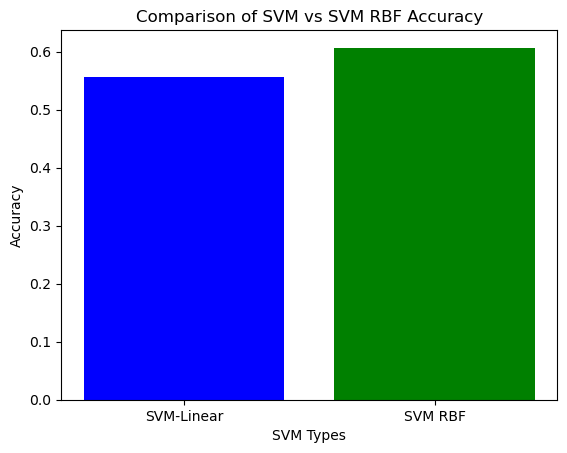

In [14]:
import matplotlib.pyplot as plt

labels = ['SVM-Linear', 'SVM RBF']

values = [average_accuracy_svm, average_accuracy_svm_rbf]

plt.bar(labels, values, color=['blue', 'green'])

plt.xlabel('SVM Types')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM vs SVM RBF Accuracy')

plt.show()
